# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [15]:
# import libraries
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import time
import matplotlib.pyplot as plt
import os
%matplotlib inline
from multiprocessing import Queue

---
## Step 0: Load The Data

Import the training and test data:
* training file : `traffic_sign_data/train.p`
* validation file: `traffic_sign_data/valid.p`
* testing file: `traffic_sign_data/test.p`

In [16]:
# Load pickled data
import pickle

# Import training and testing data
training_file = "traffic_sign_data/train.p"
validation_file= "traffic_sign_data/valid.p"
testing_file = "traffic_sign_data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [17]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# Unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

Dataset visualization


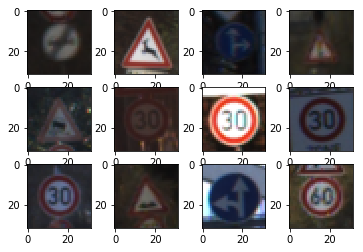

In [18]:
# Plots 12 sample images
print('Dataset visualization')
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i*500+1])

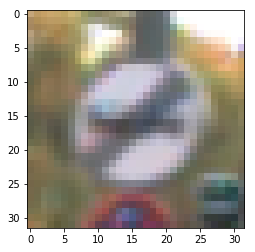

In [19]:
# plot a traffic sign
plt.imshow(X_train[100])

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

[]

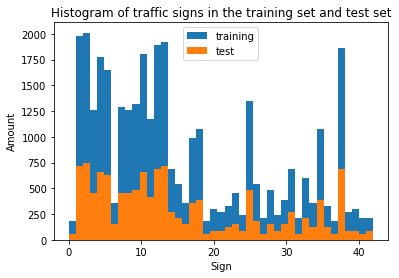

In [20]:
# Plot a histogram of the count of the number of examples of each sign in the training set
plt.hist(y_train, bins=n_classes,label= "training")
plt.hist(y_test, bins=n_classes, label = "test")
plt.legend()
plt.title('Histogram of traffic signs in the training set and test set')
plt.xlabel('Sign')
plt.ylabel('Amount')
plt.plot()

**Answer** : The training dataset for the distribution of the various classes, the classes were found to be highly scattered.Therefore, we will have to apply some data preprocessing to improve feature extraction.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### 1.Pre-process the Data Set (shuffling, normalization)

Shuffling data set serves the purpose of reducing variance and making sure that my CNN models remain general and overfit less. In this case, I apply the `shuffle()` function from `sklearn`.

In [21]:
# Shuffle training examples
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)

X_train_original = X_train
X_test_original = X_test

The image data is then normalized so that the data has mean zero and equal variance.

In [22]:
# Normalise input
X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

### 2. Split the dataset into train, validation set

Split the data set into training and validation set with 80% training samples and 20% validation samples. 80/20 is recommended train-test-validation split ratio.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2,
                                                  random_state=42)

### 3. Model Architecture

At the beginning, I tried with 3 different architecture from the article [CNN Design for Real-Time Traffic Sign Recognition](https://www.sciencedirect.com/science/article/pii/S1877705817341231). The second architecture offers the promising result with accuracy > 0.92 and fewer convolutional layers. After a few unsuccessful attemps to modify the parameter, I added 1 more fully connected layer and chose the folowing architecture: 

* **First layer**: Convolutional layer (feature extraction)
* **Second layer**: Fully connected neural layer with Rectifier Linear Unit (ReLU) activation
* **Third layer**: Another fully connected neural layer with ReLU activation
* **Output classification layer**: Fully connected neural network layer

The convolutional network takes 3 channels color information and normalised data as input.

The parameters for each layer are listed in the table below:

| Layer         | Dimension           | Parameters  |
| ---   | ---        | ---        |
| Convolutional Layer | <ul><li>Input = (32,32,3)</li><li>Output = (5,5,32) then flatten to 800</li></ul> | <ul><li>VALID padding</li><li>Kernel size = (3,3)</li><li>Number of filters = 32</li><li>Pooling size = (2,2)</li><li>ReLU activation</li><li>drop out = 90%</li></ul> |
| Fully Connected Layer 1 | <ul><li>Input = 800</li><li>Output = 512</li></ul> | <ul><li>ReLU activation</li><li>drop out = 90%</li><li>WX+b</li></ul> |
| Fully Connected Layer 2 | <ul><li>Input = 512</li><li>Output = 128</li></ul> | <ul><li>ReLU activation</li><li>drop out = 90%</li><li>WX+b</li></ul> |
| Classification Layer | <ul><li>Input = 128</li><li>Output = 43</li></ul> | <ul><li>WX+b</li><li>Softmax</li></ul> |


In [24]:
# Network parameters
n_input = 32 * 32 * 3
nb_filters = 32
kernel_size = (3, 3)
input_shape = (32, 32, 3)
n_fc1 = 512
n_fc2 = 128
in_channels = 3
pool_size = 2

dropout_convolutional = 0.9
dropout_fully_connected = 0.9

weights_stddev = 0.1
weights_mean = 0.0
biases_mean = 0.0

padding = 'VALID'
if padding == 'SAME':
    conv_output_length = 6
elif padding == 'VALID':
    conv_output_length = 5
else:
    raiseException("Unknown padding.")

In [25]:
# tf Graph input
x_unflattened = tf.placeholder("float", [None, 32, 32, 3])
x = x_unflattened

y_rawlabels = tf.placeholder("int32", [None])
y = tf.one_hot(y_rawlabels, depth=43, on_value=1., off_value=0., axis=-1)

I am using the python function blocks to implement convolutional network architecture from from [aymericdamien/TensorFlow-Examples](https://github.com/aymericdamien/TensorFlow-Examples/tree/master/examples/3_NeuralNetworks) 

In [26]:
## Create model
def conv2d(x, W, b, strides=3):
    """Conv2D wrapper, with bias and relu activation"""
    # strides = [batch, in_height, in_width, channels]
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2, padding_setting='SAME'):
    """MaxPool2D wrapper."""
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding=padding_setting)

def conv_net(model_x, model_weights, model_biases, model_pool_size, 
             model_dropout_conv, model_dropout_fc, padding='SAME'):
    """Convolutional neural network model."""
    # Convolution Layer 1
    conv1 = conv2d(model_x, model_weights['conv1'], model_biases['conv1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=model_pool_size, padding_setting=padding)
    conv1 = tf.nn.dropout(conv1, model_dropout_conv)

    # Fully connected layer 1
    # Reshape conv1 output to fit fully connected layer input
    conv1_shape = conv1.get_shape().as_list()
    fc1 = tf.reshape(conv1, [-1, conv1_shape[1]*conv1_shape[2]*conv1_shape[3]])
    fc1 = tf.add(tf.matmul(fc1, model_weights['fc1']), model_biases['fc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, model_dropout_fc)
    # Fully connected layer 2
    fc2 = tf.add(tf.matmul(fc1, model_weights['fc2']), model_biases['fc2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, model_dropout_fc)
    # Output layer
    output = tf.add(tf.matmul(fc2, model_weights['out']), model_biases['out'])
    # Note: Softmax is outside the model
    return output


## Store layers weight & bias
def weight_variable(shape, weight_mean, weight_stddev):
    initial = tf.truncated_normal(shape, stddev=weight_stddev, mean=weight_mean)
    # alt: tf.random_normal(shape)
    return tf.Variable(initial)


def bias_variable(shape, bias_mean):
    initial = tf.constant(bias_mean, shape=shape)
    return tf.Variable(initial)


weights = {
    'conv1': weight_variable([kernel_size[0], kernel_size[1], in_channels, nb_filters], weights_mean, weights_stddev),
    'fc1': weight_variable([nb_filters * conv_output_length**2, n_fc1], weights_mean, weights_stddev),
    'fc2': weight_variable([n_fc1, n_fc2], weights_mean, weights_stddev),
    'out': weight_variable([n_fc2, n_classes], weights_mean, weights_stddev)
}

biases = {
    'conv1': bias_variable([nb_filters], biases_mean),
    'fc1': bias_variable([n_fc1], biases_mean),
    'fc2': bias_variable([n_fc2], biases_mean),
    'out': bias_variable([n_classes], biases_mean)
}

### 4.Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

After multiple experiments and observations (details in the solution approach), I choose the set of parameters:
* learning_rate = 0.001
* training_epochs = 60
* batch_size = 100

In [27]:
# Training parameters
learning_rate = 0.001 # recommended value [0.001,0.003,0.005,0.01,..]
training_epochs = 60
batch_size = 100

In [28]:
initial_learning_rate = learning_rate
display_step = 1
n_train = len(X_train)
anneal_mod_frequency = 15
# Annealing rate of 1: learning rate remains constant.
annealing_rate = 1

print_accuracy_mod_frequency = 1

# Construct model
pred = conv_net(x, weights, biases, pool_size, dropout_convolutional, dropout_fully_connected, padding=padding)
pred_probs = tf.nn.softmax(pred)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Function to initialise the variables
init = tf.initialize_all_variables()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

### RUN MODEL ###
# Launch the graph
sess = tf.Session()

# Initialise variables
sess.run(init)

# Initialise time logs
init_time = time.time()
epoch_time = init_time
epoch_accuracies = []
validation_accuracy = 0

# Training cycle
for epoch in range(training_epochs):
    if validation_accuracy > 0.965:
        break
        
    avg_cost = 0.

    total_batch = int(n_train / batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x, batch_y = np.array(X_train[i * batch_size:(i + 1) * batch_size]), \
                           np.array(y_train[i * batch_size:(i + 1) * batch_size])
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x_unflattened: batch_x, y_rawlabels: batch_y})
        # Compute average loss
        avg_cost += c / total_batch
        # print(avg_cost)
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch + 1), "cost=",
              "{:.9f}".format(avg_cost))
        last_epoch_time = epoch_time
        epoch_time = time.time()
        # print("Time since last epoch: ", epoch_time - last_epoch_time)

    if (epoch + 1) % print_accuracy_mod_frequency == 0:
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        # Line below needed only when not using `with tf.Session() as sess`
        with sess.as_default():
            epoch_accuracy = accuracy.eval({x_unflattened: X_val, y_rawlabels: y_val})      
            epoch_accuracies.append(epoch_accuracy)
            validation_accuracy = epoch_accuracy
            print("Accuracy (validation):", epoch_accuracy)

print("Optimization Finished!")

# Test model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
train_predict_time = time.time()
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# Line below needed only when not using `with tf.Session() as sess`
with sess.as_default():
    print("Accuracy (test):", accuracy.eval({x_unflattened: X_test, y_rawlabels: y_test}))
test_predict_time = time.time()
print("Time to calculate accuracy on test set: ", test_predict_time - train_predict_time)

#save model
saver.save(sess, './output/model/alpha_'+str(learning_rate)+'_batchsize_'+str(batch_size)+'_epochs_'+str(training_epochs))
print("Model saved")


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 2.077440764
Accuracy (validation): 0.605747
Epoch: 0002 cost= 0.975166398
Accuracy (validation): 0.739368
Epoch: 0003 cost= 0.680149905
Accuracy (validation): 0.79296
Epoch: 0004 cost= 0.526361314
Accuracy (validation): 0.837356
Epoch: 0005 cost= 0.427842717
Accuracy (validation): 0.853448
Epoch: 0006 cost= 0.363084539
Accuracy (validation): 0.871121
Epoch: 0007 cost= 0.306452799
Accuracy (validation): 0.887356
Epoch: 0008 cost= 0.269784787
Accuracy (validation): 0.894971
Epoch: 0009 cost= 0.235846258
Accuracy (validation): 0.907328
Epoch: 0010 cost= 0.211056837
Accuracy (validation): 0.915805
Epoch: 0011 cost= 0.187876015
Accuracy (validation): 0.913218
Epoch: 0012 cost= 0.168501636
Accuracy (validation): 0.921264
Epoch: 0013 cost= 0.153017191
Accuracy (validation): 0.920402
Epoch: 0014 cost= 0.137517511
Accuracy (validation): 0.928161
Epoch: 0015 cost= 0.122346260
Accuracy (validation): 0.9206

### 5.Solution approach

The idea of my approach is finding a maximum value of validation accuracy with learning rate tuning then we find the optimal epochs for that learning rate. I would use batch size = 100 and drop out = 0.9 as recommended (also from experience). By applying this approach, I would achieve a maximum validation accuracy with minimal epochs required ( better accuracy and less training time).

The parameter tuning process is:

* Fix the training epochs at 100, batch size at 100, drop out = 0.9
* Run the experiment with recommended alpha learning rate parameters `[0.0005,0.001,0.003,0.005,0.01,...]`
* Start with `0.0005`. If the validation accuracy increases, continue to the next learning value in the list. When the validation accuracy starts to decrease comparing to the last learning rate parameter(Underfitting). Choose the previous learning rate.
* In case validation accuracy decreases from `0.0005`(Underfitting), reduce the learning rate to `[...,0.0001,0.0003]` to find a local maximum of validation accuracy.  
* Run the chosen alpha learning rate and plot the validation accuracy and cost with respect to epochs.
* Choose the training epochs when the accruracy curve flattens. At that epoch, the cost should be closed to 0.

Alpha learning rate experiment result:

| Parameters         | Validation Accuracy           | Test accuracy  |
| ---   | ---        | ---        |
| <ul><li>Learning rate: 0.0005</li><li>Training Epochs: 100</li><li>Batch size: 100</li></ul> | 0.962787 | 0.763341 |
| <ul><li>Learning rate: 0.001</li><li>Training Epochs: 100</li><li>Batch size: 100</li></ul> | 0.968534 | 0.763025 |
| <ul><li>Learning rate: 0.001</li><li>Training Epochs: 100</li><li>Batch size: 100</li></ul> | 0.949282 | 0.751306 |

**Training Parameters:**

* Learning rate: 0.0005
* Training Epochs: 100
* Batch size: 100
* Type of optimiser: AdamOptimizer
* Dropout (conv layer): 0.9
* Dropout (fully connected layers): 0.9
* Padding: VALID

**Validation accuracy**: 0.962787

**Test accuracy**: 0.763341

The result is documented in file [alpha_0.0005_batchsize_100_epochs_100.csv](output/alpha_0.0005_batchsize_100_epochs_50.csv)

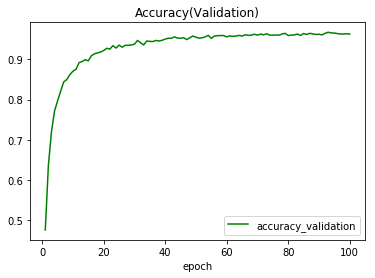

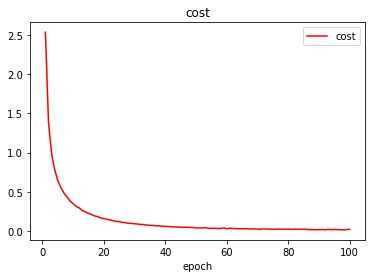

In [29]:
# Plot the accuracy in validation set and cost to choose the appropriate number of epochs
result_1 = pd.read_csv('output/alpha_0.0005_batchsize_100_epochs_100.csv')
result_1.plot(x='epoch', y='accuracy_validation',title='Accuracy(Validation)',c='Green')
result_1.plot(x='epoch', y='cost',title='cost',c='Red')

**Training Parameters:**

* Learning rate: 0.001
* Training Epochs: 100
* Batch size: 100
* Type of optimiser: AdamOptimizer
* Dropout (conv layer): 0.9
* Dropout (fully connected layers): 0.9
* Padding: VALID

**Validation accuracy**: 0.968534

**Test accuracy**: 0.763025

The result is documented in file [alpha_0.001_batchsize_100_epochs_100.csv](output/alpha_0.001_batchsize_100_epochs_50.csv)

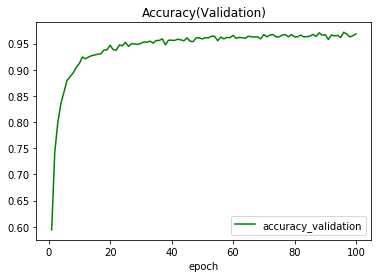

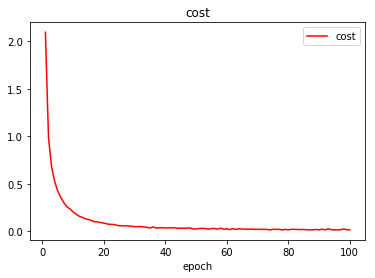

In [30]:
result_1 = pd.read_csv('output/alpha_0.001_batchsize_100_epochs_100.csv')
result_1.plot(x='epoch', y='accuracy_validation',title='Accuracy(Validation)',c='Green')
result_1.plot(x='epoch', y='cost',title='cost',c='Red')

**Training Parameters:**

* Learning rate: 0.003
* Training Epochs: 100
* Batch size: 100
* Type of optimiser: AdamOptimizer
* Dropout (conv layer): 0.9
* Dropout (fully connected layers): 0.9
* Padding: VALID

**Validation accuracy**: 0.949282

**Test accuracy**: 0.751306

The result is documented in file [alpha_0.003_batchsize_100_epochs_100.csv](output/alpha_0.003_batchsize_100_epochs_50.csv)

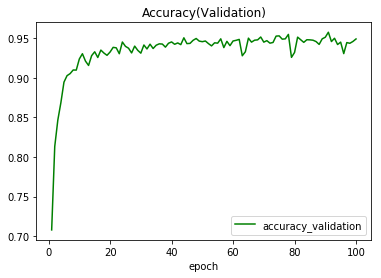

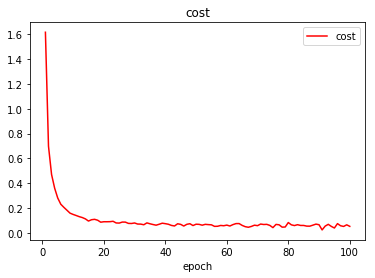

In [31]:
result_2 = pd.read_csv('output/alpha_0.003_batchsize_100_epochs_100.csv')
result_2.plot(x='epoch', y='accuracy_validation',title='Accuracy(Validation)',c='Green')
result_2.plot(x='epoch', y='cost',title='cost',c='Red')

By observing the accuracy and cost for alpha learning rate and epoch values, the model reachs the 96% validation accuracy and the cost reduces to `0.027` which is `< 2% beginning cost (2.2)` after 50 epochs with the set of parameter `learning_rate = 0.001`, `batch_size = 100`, `training_epochs = 60`. After that, the validation accuracy fluctuates slightly at 96% and almost no improvement. After 60 epochs, the accuracy on test set stays around 76%. 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [32]:
# Read image from path and display
def displayImage(path):
    """Reads and returns image.
    Helper function to examine how an image is represented.
    """
    image = mpimg.imread(path)
    print('This image is:', type(image), 'with dimensions:', image.shape)
    plt.imshow(image)
    return image

This image is: <class 'numpy.ndarray'> with dimensions: (312, 367, 3)


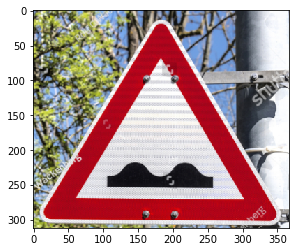

In [33]:
bumpy_sign = displayImage('test_images/bumpy_road.png')

This image is: <class 'numpy.ndarray'> with dimensions: (1789, 1797, 3)


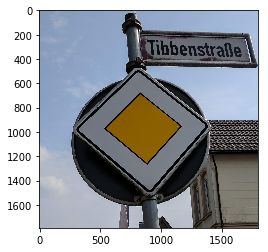

In [34]:
priority_sign = displayImage('test_images/priority.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (866, 1300, 3)


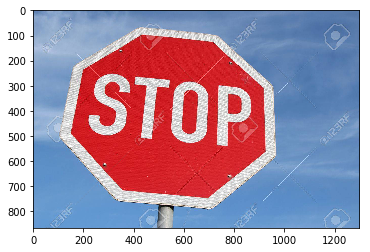

In [35]:
stop_sign = displayImage('test_images/stop.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (213, 211, 3)


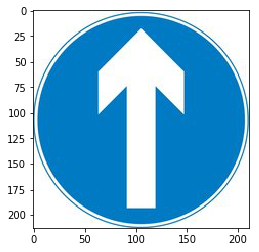

In [36]:
ahead_only_sign = displayImage('test_images/ahead_only.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (1037, 699, 3)


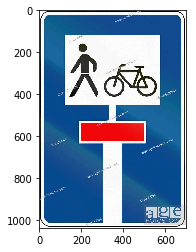

In [37]:
culdesac_sign = displayImage('test_images/cul-de-sac.jpg')

### Predict the Sign Type for Each Image

In [38]:
def predictSign(path):
    """Read image from dir, show image and print model's prediction (of 
    which traffic sign this image is).
    """
    # Read in image from file
    image = mpimg.imread(path)
    # Show image
    plt.imshow(image) 
    classification = sess.run(tf.argmax(pred, 1), feed_dict={x_unflattened: [image]})
    print(classification)
    print('CNN predicted', classification[0])
    return image

#### Test 1: Bumpy sign

[22]
CNN predicted 22


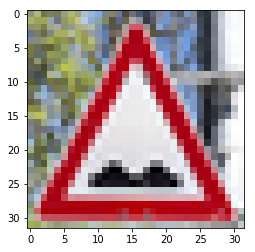

In [39]:
bumpy_sign = predictSign('test_images/bumpy_road_resize.png')

Correct! The Convolutional Network predict this sign is Bumpy Road (ID = 22).

#### Test 2: Priority sign

[12]
CNN predicted 12


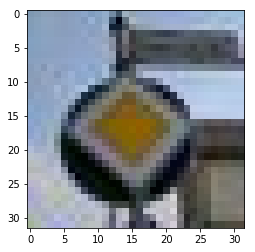

In [40]:
priority_sign = predictSign('test_images/priority_resize.jpg')

Correct! The Convolutional Neural Network predicts this sign is Priority Road (ID=12)

#### Test 3: Stop sign

[14]
CNN predicted 14


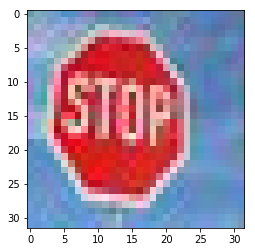

In [41]:
stop_sign = predictSign('test_images/stop_resize.jpg')

Correct! The Convolutional Neural Network predicts this sign is Stop (ID=14)

#### Test 4: Ahead Only sign

[12]
CNN predicted 12


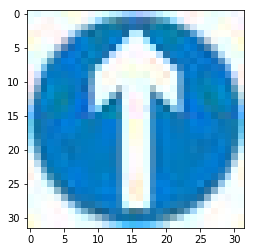

In [42]:
ahead_only_sign = predictSign('test_images/ahead_only_resize.jpg')

Correct! The Convolutional Neural Network predicts this sign is Ahead Only (ID=35)

#### Test 5: Dead end (this sign is not in the training data set)

[25]
CNN predicted 25


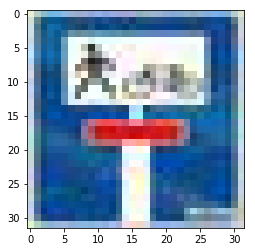

In [43]:
culdesac_sign = predictSign('test_images/cul-de-sac_resize.jpg')

The dead end sign is not included in the training data set. The Convolutional Neural Network confuses this sign is Priority road (ID = 12)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Analyze Performance

In [44]:
def predictCertaintyOfImage(image):
    """Return model's top five choices for what traffic sign 
    this image is and its confidence in its predictions.
    """
    top_five = sess.run(tf.nn.top_k(tf.nn.softmax(pred), k=5), feed_dict={x_unflattened: [image]})
    print("Top five: ", top_five)
    plt.imshow(image)
    return top_five

In [45]:
sign_names = pd.read_csv("signnames.csv")
sign_names.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [46]:
def plotCertaintyArrays(probabilities, labels):
    """Plot model's probabilities (y) and traffic sign labels (x) 
    in a bar chart.
    """
    y_pos = np.arange(len(labels))
    performance = [10,8,6,4,2,1]

    plt.bar(y_pos, probabilities, align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.ylabel('Probability')
    plt.xlabel('Traffic sign')
    plt.title('Model\'s certainty of its predictions')

    plt.show()
    print("Traffic Sign Key")
    for label in labels:
        print(label, ": ", sign_names.loc[label]['SignName'])

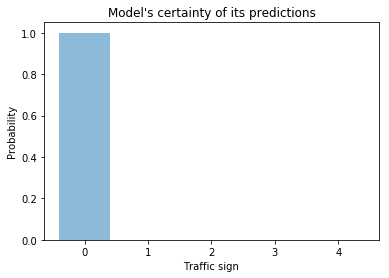

Traffic Sign Key
0 :  Speed limit (20km/h)
1 :  Speed limit (30km/h)
2 :  Speed limit (50km/h)
3 :  Speed limit (60km/h)
4 :  Speed limit (70km/h)


In [47]:
plotCertaintyArrays([ 1.,  0.,  0.,  0.,  0.], [0, 1, 2, 3, 4])

Top five:  TopKV2(values=array([[  8.06302369e-01,   1.12832256e-01,   8.07827488e-02,
          5.91703501e-05,   1.38690903e-05]], dtype=float32), indices=array([[22, 26, 15, 25, 31]], dtype=int32))


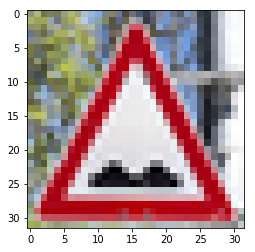

In [48]:
bumpy_sign_certainties = predictCertaintyOfImage(bumpy_sign)

In [49]:
bumpy_sign_certainties[1][0]

array([22, 26, 15, 25, 31], dtype=int32)

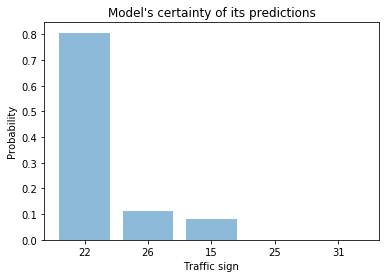

Traffic Sign Key
22 :  Bumpy road
26 :  Traffic signals
15 :  No vehicles
25 :  Road work
31 :  Wild animals crossing


In [50]:
plotCertaintyArrays(bumpy_sign_certainties[0][0],
                      bumpy_sign_certainties[1][0])

Top five:  TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[12,  0,  1,  2,  3]], dtype=int32))


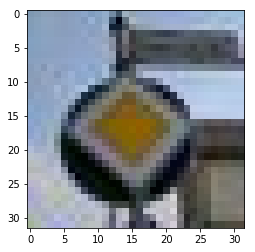

In [51]:
priority_sign_certainties = predictCertaintyOfImage(priority_sign)

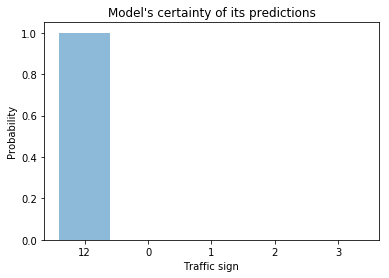

Traffic Sign Key
12 :  Priority road
0 :  Speed limit (20km/h)
1 :  Speed limit (30km/h)
2 :  Speed limit (50km/h)
3 :  Speed limit (60km/h)


In [52]:
plotCertaintyArrays(priority_sign_certainties[0][0], priority_sign_certainties[1][0])

Top five:  TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[14,  0,  1,  2,  3]], dtype=int32))


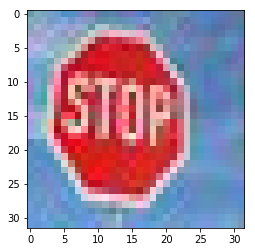

In [53]:
stop_sign_certainties = predictCertaintyOfImage(stop_sign)

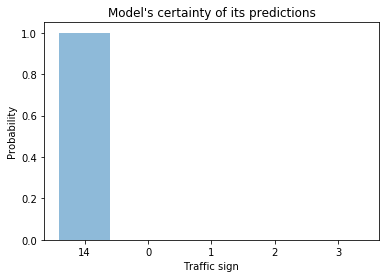

Traffic Sign Key
14 :  Stop
0 :  Speed limit (20km/h)
1 :  Speed limit (30km/h)
2 :  Speed limit (50km/h)
3 :  Speed limit (60km/h)


In [54]:
plotCertaintyArrays(stop_sign_certainties[0][0], stop_sign_certainties[1][0])

Top five:  TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[12,  0,  1,  2,  3]], dtype=int32))


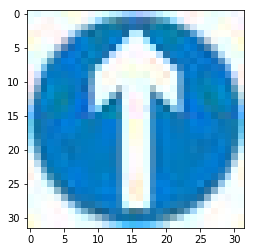

In [55]:
ahead_only_sign_certainties = predictCertaintyOfImage(ahead_only_sign)

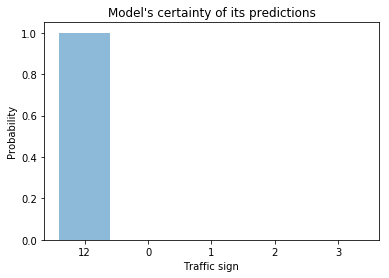

Traffic Sign Key
12 :  Priority road
0 :  Speed limit (20km/h)
1 :  Speed limit (30km/h)
2 :  Speed limit (50km/h)
3 :  Speed limit (60km/h)


In [56]:
plotCertaintyArrays(ahead_only_sign_certainties[0][0],ahead_only_sign_certainties[1][0])

Top five:  TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[25,  0,  1,  2,  3]], dtype=int32))


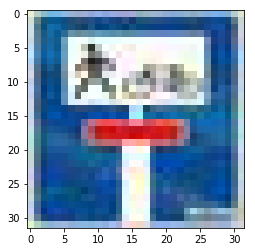

In [57]:
culdesac_sign_certainties = predictCertaintyOfImage(culdesac_sign)

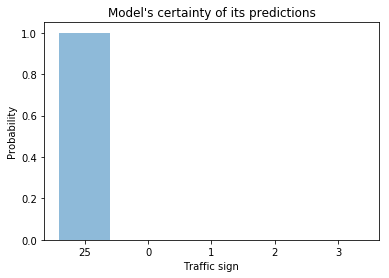

Traffic Sign Key
25 :  Road work
0 :  Speed limit (20km/h)
1 :  Speed limit (30km/h)
2 :  Speed limit (50km/h)
3 :  Speed limit (60km/h)


In [58]:
plotCertaintyArrays(culdesac_sign_certainties[0][0], culdesac_sign_certainties[1][0])

In [59]:
# Close the current session.
sess.close()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [60]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")